## imports

In [56]:
import numpy as np
import pandas as pd
import copy

In [57]:
def write_as_log(title,data):
    '''
    Function can be used to write a log in the logs folder. 
    Data has to be an array 
    '''
    with open(f'results/Combining/{title}.txt','w') as temp:
        if type(data) == list:
            for row in data:
                temp.write(str(row))
                temp.write('\n')

## optimal greedy clustering

In [58]:
# laad omvormer
omvormer = np.load('omvormer.npy',allow_pickle='TRUE').item()

#load optimal greedy cautious threshold 0.8 --> greedy optimization 0.7
optimal = np.load("C://Users//lexfo//PycharmProjects//thesis_lex//results//Clustering//optimal_greedy.npy",allow_pickle='TRUE')
best_greedy_clustering = []
for i in range(len(optimal)):
    best_greedy_clustering.append(optimal[i])

In [59]:
clusters_omgevormd = [] 
for i in range(len(best_greedy_clustering)):
    clusters_omgevormd.append([omvormer.get(item,item) for item in best_greedy_clustering[i]])
# clusters_omgevormd

In [60]:
dataframe_best_greedy = pd.DataFrame.from_records(clusters_omgevormd)

<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>

In [61]:
from operator import is_not
from functools import partial
for i in dataframe_best_greedy.values.tolist():
    filter(partial(is_not, None), i)

## Open feature selection techniques

#### SVC-RFE

In [62]:
SVC_RFE = pd.read_csv('results/Feature_importance_ranking/SVC_RFE_Ranking.csv')
SVC_RFE['imp_abs'] = abs(SVC_RFE['imp'])
SVC_RFE = SVC_RFE.sort_values(by=['imp_abs'], ascending = False)
SVC_RFE['imp_abs_norm'] = SVC_RFE['imp_abs']/sum(SVC_RFE['imp_abs'])
SVC_RFE = SVC_RFE.reset_index(drop=True)
svc_rfe_Ranking = list(SVC_RFE['var'])

Text(0.5, 0, '')

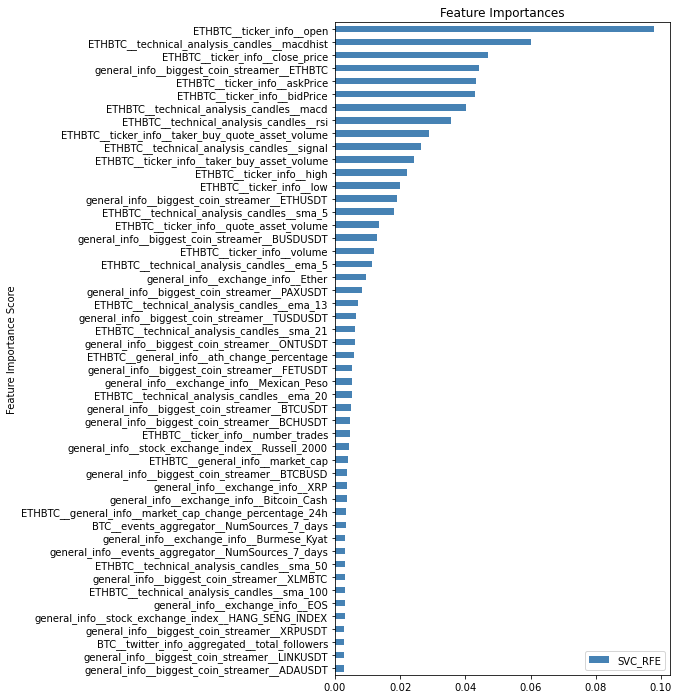

In [75]:
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 12


# plt.style.use('ggplot');
SVC_RFE.iloc[:50].plot(kind='barh',x = 'var', y='imp_abs_norm',color='steelblue', label='SVC_RFE',title='Feature Importances').invert_yaxis()
plt.ylabel('Feature Importance Score')
plt.xlabel('')




#### RF-RFE

In [64]:
RF_RFE = pd.read_csv('results/Feature_importance_ranking/RE_RFE_Ranking.csv')
rf_rfe_Ranking = list(RF_RFE['var'])

In [65]:
RF_RFE

,var,imp
0,ETHBTC__technical_analysis_candles__rsi,0.112650
1,ETHBTC__technical_analysis_candles__macdhist,0.022072
2,ETHBTC__technical_analysis_candles__macd,0.019724
3,ETHBTC__ticker_info__taker_buy_asset_volume,0.016933
4,ETHBTC__ticker_info__taker_buy_quote_asset_volume,0.016779
5,ETHBTC__technical_analysis_candles__signal,0.014302
6,ETHBTC__ticker_info__volume,0.013449
7,ETHBTC__ticker_info__quote_asset_volume,0.012662
8,ETHBTC__ticker_info__number_trades,0.011073
9,ETHBTC__ticker_info__askQty,0.008743


Text(0.5, 0, '')

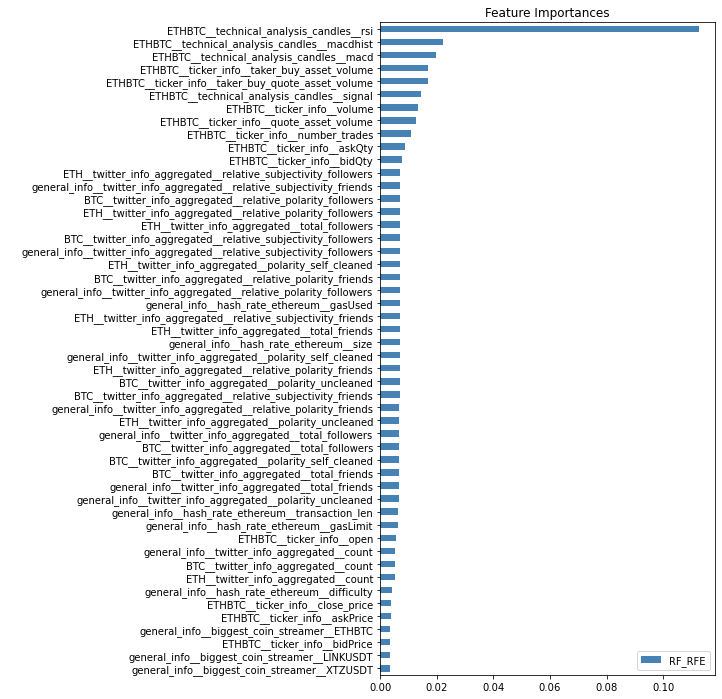

In [78]:
RF_RFE.iloc[:50].plot(kind='barh',x = 'var', y='imp',color='steelblue', label='RF_RFE',title='Feature Importances').invert_yaxis()
plt.ylabel(' ')
plt.xlabel('')


#### Boruta

In [67]:
Boruta = pd.read_csv('results/Feature_importance_ranking/Boruta_Ranking.csv')
Boruta.rename(columns={'Unnamed: 0':'var'}, inplace=True)
Boruta = Boruta.sort_values(by=['meanImp'], ascending = False)
Boruta['imp_norm'] = Boruta['meanImp']/sum(Boruta['meanImp'])
Boruta = Boruta.reset_index(drop=True)
Boruta_Ranking = list(Boruta['var'])

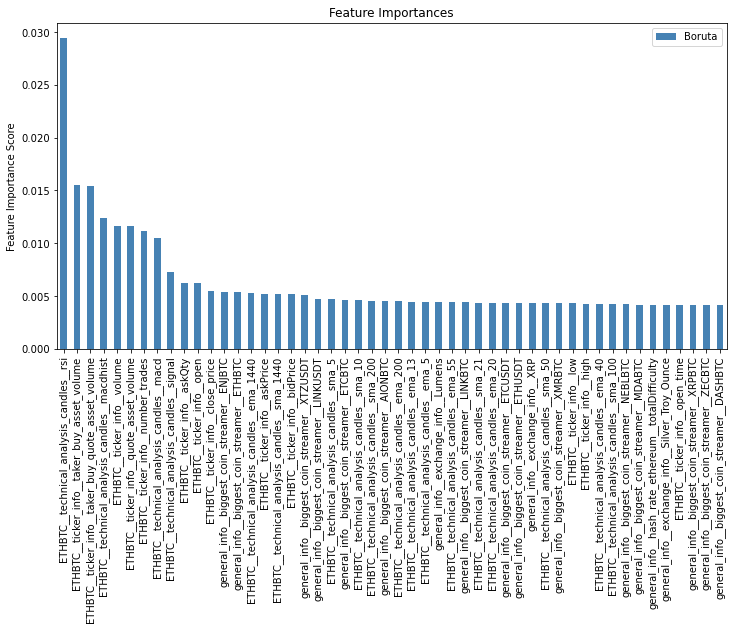

In [14]:
# plt.style.use('ggplot');
Boruta.iloc[:50].plot(kind='bar',x = 'var', y='imp_norm',color='steelblue', label='Boruta',title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('')
plt.axvline(x=1000,color='black')


#### XGBoost

In [15]:
XGBoost = pd.read_csv('results/Feature_importance_ranking/XGBoost_ranking.csv')
XGBoost['imp_norm'] = XGBoost['imp']/sum(XGBoost['imp'])
XGBoost_ranking = list(XGBoost['var'])

Text(0.5, 0, '')

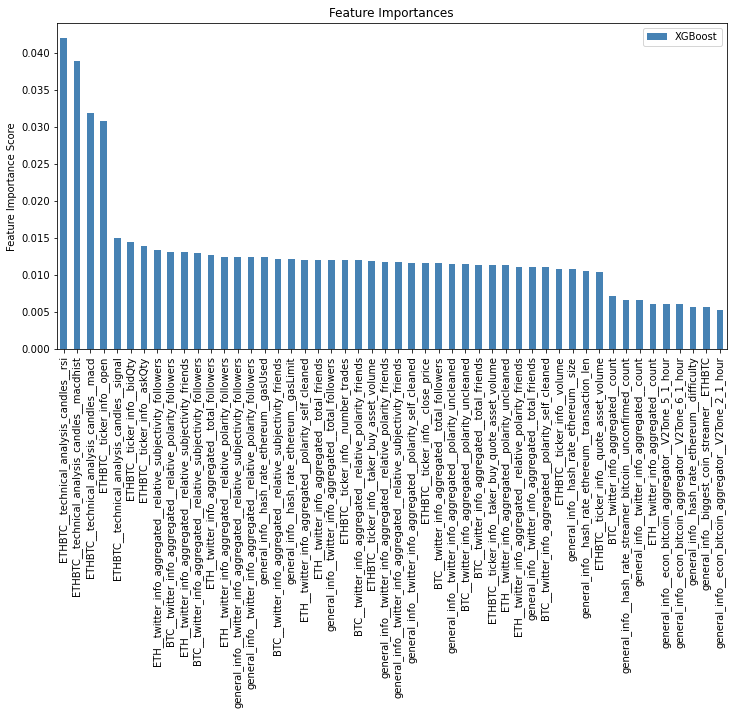

In [55]:
XGBoost.iloc[:50].plot(kind='bar',x = 'var', y='imp_norm',color='steelblue', label='XGBoost',title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('')
# plt.axvline(x=1000,color='black')


<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>

## combine clustering with feature ranking

In [17]:
def pick_1_per_cluster(dataframe_kluster,features):
    nieuwe = copy.deepcopy(dataframe_kluster)
    xgboost = features
    row_selected = []
    final_columns = []
    deleted_indexen = [] 
    counter = 0
    for j in xgboost:
        counter += 1 
        for i in range(len(nieuwe)):
            if i in row_selected: 
                pass
            elif j in nieuwe.loc[i].values:
                row_selected.append(i)
                print(i,j,counter)
                xgboost = [feature for feature in xgboost if feature not in nieuwe.loc[i].values]
                nieuwe.iloc[i].values[:] = 0
                final_columns.append(j)
            else: 
                pass
    return final_columns

In [36]:
def combine_ranking_with_clustering(best_clustering, name_of_fs_technique, feature_selection_ranking,top_x_of_ranking=0):
    if top_x_of_ranking > 1:
        ranking = feature_selection_ranking[:top_x_of_ranking]
        final_columns_after_combining = pick_1_per_cluster(best_clustering,ranking)
        print(len(final_columns_after_combining))
        return final_columns_after_combining
    else:
        ranking = feature_selection_ranking
        final_columns_after_combining = pick_1_per_cluster(best_clustering,ranking)
        return final_columns_after_combining

#### SVM-RFE

In [19]:
final_svc_rfe = combine_ranking_with_clustering(dataframe_best_greedy, 'svc_rfe', svc_rfe_Ranking)
print(len(final_svc_rfe))

1 ETHBTC__ticker_info__open 1
19 ETHBTC__technical_analysis_candles__macdhist 2
74 general_info__biggest_coin_streamer__ETHBTC 4
11 ETHBTC__technical_analysis_candles__macd 7
89 ETHBTC__technical_analysis_candles__rsi 8
5 ETHBTC__ticker_info__taker_buy_quote_asset_volume 9
109 general_info__biggest_coin_streamer__ETHUSDT 14
98 general_info__biggest_coin_streamer__BUSDUSDT 17
111 general_info__biggest_coin_streamer__ONTUSDT 25
95 ETHBTC__general_info__ath_change_percentage 26
93 general_info__exchange_info__Mexican_Peso 28
32 ETHBTC__ticker_info__number_trades 32
104 general_info__exchange_info__XRP 36
92 general_info__exchange_info__Bitcoin_Cash 37
23 ETHBTC__general_info__market_cap_change_percentage_24h 38
12 BTC__events_aggregator__NumSources_7_days 39
112 general_info__biggest_coin_streamer__XLMBTC 43
50 BTC__twitter_info_aggregated__total_followers 48
43 general_info__econ_bitcoin_aggregator__V2Tone_5_7_days 52
8 ETH__twitter_info_aggregated__total_friends 53
91 BTC__events_aggreg

In [20]:
final_columns_svc_rfe = SVC_RFE[~SVC_RFE['var'].isin(final_svc_rfe) == False]

In [21]:
final_columns_svc_rfe = final_columns_svc_rfe.reset_index(drop=True)

In [22]:
# final_columns_svc_rfe.to_csv(r'results/Combining/final_columns_svc_rfe.csv', index = False)

#### RF-RFE

In [43]:
final_rf_rfe = combine_ranking_with_clustering(dataframe_best_greedy, 'rf_rfe', rf_rfe_Ranking)
print(len(final_rf_rfe))

89 ETHBTC__technical_analysis_candles__rsi 1
19 ETHBTC__technical_analysis_candles__macdhist 2
11 ETHBTC__technical_analysis_candles__macd 3
5 ETHBTC__ticker_info__taker_buy_asset_volume 4
32 ETHBTC__ticker_info__number_trades 9
79 ETHBTC__ticker_info__askQty 10
103 ETHBTC__ticker_info__bidQty 11
10 ETH__twitter_info_aggregated__relative_subjectivity_followers 12
86 general_info__twitter_info_aggregated__relative_subjectivity_friends 13
48 BTC__twitter_info_aggregated__relative_polarity_followers 14
85 ETH__twitter_info_aggregated__relative_polarity_followers 15
73 ETH__twitter_info_aggregated__total_followers 16
57 BTC__twitter_info_aggregated__relative_subjectivity_followers 17
52 general_info__twitter_info_aggregated__relative_subjectivity_followers 18
51 ETH__twitter_info_aggregated__polarity_self_cleaned 19
76 BTC__twitter_info_aggregated__relative_polarity_friends 20
59 general_info__twitter_info_aggregated__relative_polarity_followers 21
31 general_info__hash_rate_ethereum__gasU

In [24]:
final_columns_rf_rfe = RF_RFE[~RF_RFE['var'].isin(final_rf_rfe) == False]
    

In [25]:
final_columns_rf_rfe = final_columns_rf_rfe.reset_index(drop=True)

In [26]:
# final_columns_rf_rfe.to_csv(r'results/Combining/final_columns_rf_rfe.csv', index = False)

#### Boruta

In [51]:
final_boruta = combine_ranking_with_clustering(dataframe_best_greedy, 'Boruta', Boruta_Ranking,280)
print(len(final_boruta))

89 ETHBTC__technical_analysis_candles__rsi 1
5 ETHBTC__ticker_info__taker_buy_asset_volume 2
19 ETHBTC__technical_analysis_candles__macdhist 4
32 ETHBTC__ticker_info__number_trades 7
11 ETHBTC__technical_analysis_candles__macd 8
79 ETHBTC__ticker_info__askQty 10
1 ETHBTC__ticker_info__open 11
62 general_info__biggest_coin_streamer__ENJBTC 13
74 general_info__biggest_coin_streamer__ETHBTC 14
101 general_info__biggest_coin_streamer__XTZUSDT 19
93 general_info__biggest_coin_streamer__LINKUSDT 20
114 general_info__biggest_coin_streamer__ETCBTC 22
97 general_info__biggest_coin_streamer__AIONBTC 25
105 general_info__exchange_info__Lumens 29
109 general_info__biggest_coin_streamer__ETCUSDT 34
104 general_info__exchange_info__XRP 36
77 general_info__biggest_coin_streamer__XMRBTC 38
111 general_info__biggest_coin_streamer__NEBLBTC 43
99 general_info__biggest_coin_streamer__XRPBTC 48
4 general_info__biggest_coin_streamer__EOSBTC 51
92 general_info__exchange_info__Bitcoin_Cash 55
86 general_info_

In [28]:
final_columns_boruta = Boruta[~Boruta['var'].isin(final_boruta) == False]

In [29]:
final_columns_boruta = final_columns_boruta.reset_index(drop=True)

In [30]:
# final_columns_boruta.to_csv(r'results/Combining/final_columns_boruta.csv', index = False)

#### XGBoost

In [42]:
final_XGBoost = combine_ranking_with_clustering(dataframe_best_greedy, 'XGBoost2', XGBoost_ranking)

89 ETHBTC__technical_analysis_candles__rsi 1
19 ETHBTC__technical_analysis_candles__macdhist 2
11 ETHBTC__technical_analysis_candles__macd 3
1 ETHBTC__ticker_info__open 4
103 ETHBTC__ticker_info__bidQty 6
79 ETHBTC__ticker_info__askQty 7
10 ETH__twitter_info_aggregated__relative_subjectivity_followers 8
48 BTC__twitter_info_aggregated__relative_polarity_followers 9
67 ETH__twitter_info_aggregated__relative_subjectivity_friends 10
57 BTC__twitter_info_aggregated__relative_subjectivity_followers 11
73 ETH__twitter_info_aggregated__total_followers 12
85 ETH__twitter_info_aggregated__relative_polarity_followers 13
52 general_info__twitter_info_aggregated__relative_subjectivity_followers 14
59 general_info__twitter_info_aggregated__relative_polarity_followers 15
31 general_info__hash_rate_ethereum__gasUsed 16
100 BTC__twitter_info_aggregated__relative_subjectivity_friends 17
56 general_info__hash_rate_ethereum__gasLimit 18
51 ETH__twitter_info_aggregated__polarity_self_cleaned 19
8 ETH__twi

In [32]:
final_columns_XGBoost = XGBoost[~XGBoost['var'].isin(final_XGBoost) == False]

In [33]:
final_columns_XGBoost = final_columns_XGBoost.reset_index(drop=True)

In [34]:
# final_columns_XGBoost.to_csv(r'results/Combining/final_columns_XGBoost.csv', index = False)